In [18]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%reload_ext autoreload
%autoreload 2

from cmb.i18n import I18N
i18n = I18N(locale="en_CA")

from cmb import layout, plot, tester, widgets, cmb_utils, const
from cmb.widgets import cmb_data

layout.set_custom_layout()

from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip_on_error(line, cell):
    try:
        exec(cell)
    except Exception as e:
        print(f"Error: {e}")

In [19]:
i18n.display_markdown('workshop_overview')

# Cosmic Microwave Background (CMB) Workshop

Authors: Louis Branch and Yilun Guan

## Activity Overview

In this workshop, you will learn about the Cosmic Microwave Background (CMB) and its significance in cosmology. You'll start by understanding some basic physics concepts, like blackbody radiation and Wien's Law. Then, you'll explore how scientists study the CMB using real data from space missions. You'll also get hands-on experience with Python programming to analyze and visualize this data.

By the end of this workshop, you'll have a better understanding of the early universe and the tools scientists use to study it. Let's get started!

### Learning Goals

By the end of this notebook, you should be able to:

1. **Basics of the Cosmic Microwave Background (CMB):**
   - Describe what the CMB is and why it’s important.
   - Explain how the CMB was formed.

2. **Blackbody Radiation:**
   - Define blackbody radiation.
   - Use Planck's Law to calculate radiation.
   - Explain Wien's Law and its relation to temperature.

3. **Astronomical Data Analysis:**
   - Create and interpret blackbody radiation graphs.
   - Analyze data from the COBE satellite.

4. **Doppler Effect and Universe Expansion:**
   - Explain the Doppler effect.
   - Understand redshift and its evidence for the expanding universe.

5. **Working with Real CMB Data:**
   - Load and visualize CMB maps.
   - Compute and understand temperature fluctuations in the CMB.
   - Identify features in CMB maps.

6. **Python Programming Skills (Optional Challenge):**
   - Write Python functions for physics equations.
   - Use Python for data visualization and analysis.

In [20]:
i18n.display_markdown('workshop_intro')

## Introduction

### The Cosmic Microwave Background (CMB)

The Cosmic Microwave Background (CMB) is the afterglow of the Big Bang, the event that created our universe around 13.8 billion years ago. This faint glow fills the entire sky and is one of the most important pieces of evidence for the Big Bang theory.

#### What is the CMB?

The CMB is a form of electromagnetic radiation (EM radiation), similar to visible light but in the microwave part of the spectrum. EM radiation encompasses all forms of light, from radio waves to gamma rays, differing in wavelength and frequency. Here's a simplified explanation:

- **Wavelength and Frequency:** EM radiation behaves like waves. Wavelength is the distance between wave crests, while frequency measures how often these waves pass a given point.

- **The Electromagnetic Spectrum:** This spectrum spans from long-wavelength radio waves to short-wavelength gamma rays, with visible light occupying a small segment in the middle.

<figure>
<img src="media/em_spectrum.png" height="400"/>
<figcaption>Electromagnetic spectrum showing various types of radiation, including microwaves where the CMB is found. Adapted from <a href="https://commons.wikimedia.org/wiki/File:Electromagnetic-Spectrum.png">Wikimedia Commons</a>.</figcaption>
</figure>

#### Formation of the CMB

In the early universe, everything was so hot that atoms couldn't form; protons and electrons were separate particles. As the universe expanded and cooled, these particles combined to form neutral hydrogen atoms. This process, called recombination, allowed light to travel freely through space for the first time, creating the CMB.

#### Discovery of the CMB

The CMB was discovered accidentally in 1964 by two radio astronomers, Arno Penzias and Robert Wilson. They were working on a radio telescope and found a mysterious noise that came from all directions in the sky. This noise turned out to be the CMB, confirming predictions made by earlier scientists and providing strong evidence for the Big Bang theory. The CMB is essentially a snapshot of the early universe, capturing its conditions and evolution over time.

<figure>
<img src="media/horn.jpg" height="400"/>
<figcaption>This is the Bell Labs' horn antenna. This is the radio telescope that first measured the CMB. This photo is from April 2007. <a href="https://commons.wikimedia.org/wiki/File:Bell_Labs_Horn_Antenna_Crawford_Hill_NJ.jpg">Source.</a></figcaption>
</figure>

In [21]:
i18n.display_markdown('blackbody_intro')

## Understanding Cosmic Light

### Blackbody Radiation

Blackbody radiation describes the light emitted by an object that absorbs all light falling on it. This ideal object, called a "black body," emits light across all wavelengths. The amount of light emitted depends only on its temperature. This concept helps us understand stars and the Cosmic Microwave Background (CMB).

Planck's Law describes how much light a blackbody emits at different wavelengths. The formula is:

$B(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{\exp\left(\frac{hc}{\lambda kT}\right) - 1}$

where:

* $B(\lambda, T)$ is the spectral radiance, measured in $W/m^{3}$,
* $h$ is the Planck constant ($6.626 \times 10^{-34}$ J s),
* $c$ is the speed of light in a vacuum ($3.00 \times 10^8$ m/s),
* $k$ is the Boltzmann constant ($1.381 \times 10^{-23}$ J/K),
* $T$ is the absolute temperature of the blackbody in Kelvin (K),
* $\lambda$ is the wavelength in meters (m).

**Understanding Exponential Functions:**

An exponential function, like $\exp(x)$, represents rapid growth where the value of the function increases exponentially as xx increases. In Planck's Law, the exponential term adjusts the amount of light emitted at different wavelengths based on temperature.


### Coding Challenge: Write your own implementation of Planck's Law:

Try implementing Planck's Law in Python to see how much light is emitted at different wavelengths and temperatures.

In [22]:
def blackbody_radiation(wavelength, temp):
    """
    Your implementation of the blackbody radiation law equation using wavelength in meters.
    
    Parameters:
    - wavelength: Wavelength of the radiation (in meters).
    - temp: Temperature of the blackbody (in Kelvin).
    
    Returns:
    - Spectral radiance of the blackbody (in W/m^3).
    """
    # Reminder of the Planck's law formula in SI units:
    # B(lambda, T) = (2hc^2 / lambda^5) * 1 / (exp(hc / (lambda kT)) - 1)
    # where h = 6.626e-34 (J·s), c = 3e8 (m/s), k = 1.381e-23 (J/K),
    # lambda is in meters, and T is in Kelvin.

    # Hint: In Python, use '**' to denote exponentiation. For example, c squared is written as c**2.
    # NumPy's exp function (np.exp) is used for exponential calculations. For e^x, you write np.exp(x).

    h = 6.62607015e-34  # Planck constant, J·s
    c = 299792458       # Speed of light, m/s
    k = 1.380649e-23    # Boltzmann constant, J/K

    exponent_factor = np.exp(h * c / (wavelength * k * temp))
    spectral_radiance = (2 * h * c**2) / (wavelength**5 * (exponent_factor - 1))
    return spectral_radiance

In [23]:
# Test your implementation of the Planck's Law
print(tester.test_blackbody_radiation(blackbody_radiation))

All tests passed! Your implementation appears to be correct.


In [ ]:
i18n.display_markdown('blackbody_visualizing')
widgets.blackbody_radiation(blackbody_radiation)
i18n.display_markdown('blackbody_coding')

#### Visualizing the Blackbody Radiation

interactive(children=(FloatSlider(value=5778.0, description='Temperature (K):', layout=Layout(width='45%'), ma…

Output()

### Coding Challenge: Blackbody Radiation Plot

**Instructions:**

1. Define Wavelengths: Use `np.linspace(start, end, num)` to create an array of wavelengths (in meters).
2. Select Temperatures: Choose temperatures (in Kelvin) for different objects or scenarios you want to explore (e.g., Sun, Sirius A, etc).
3. Calculate Spectral Radiance: Implement the blackbody_radiation function using Planck's Law to compute spectral radiance values for each temperature and wavelength range.
4. Plot Your Results: Write Python code to plot the spectral radiance curves for the chosen temperatures. Remember to label your axes appropriately and include a legend to differentiate between temperatures.

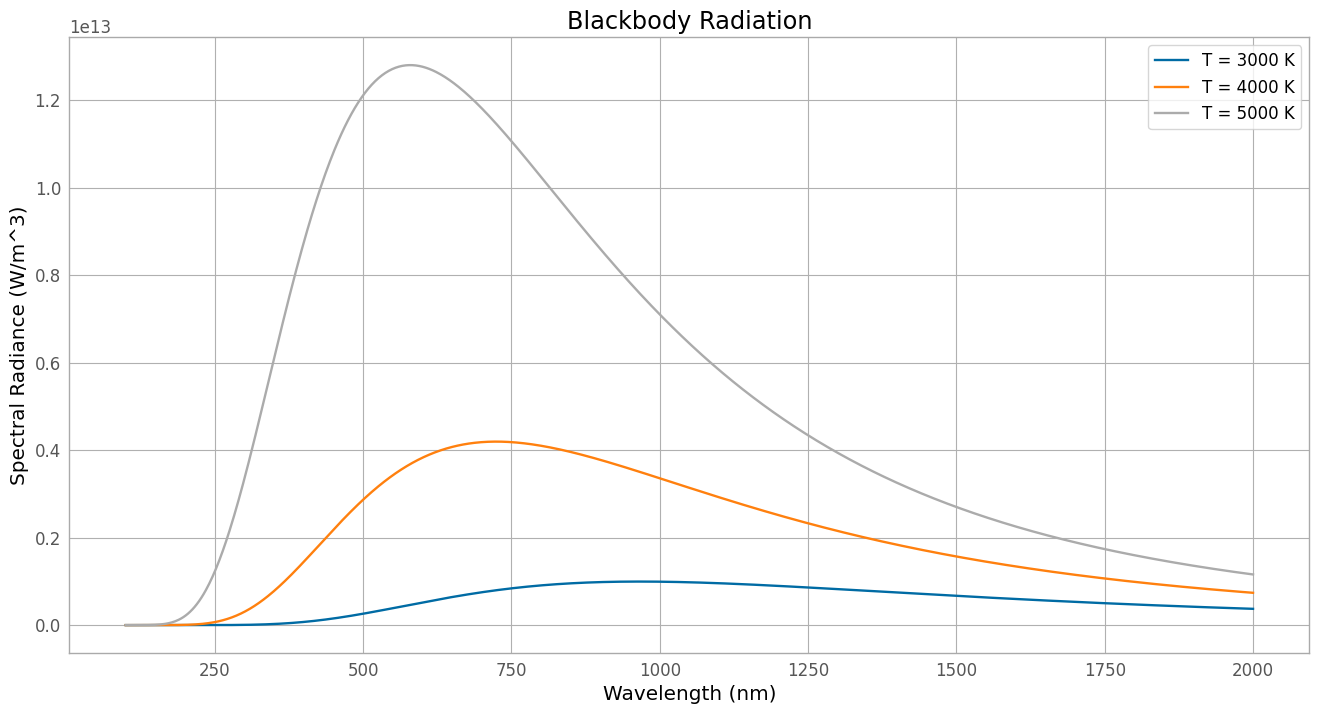

In [25]:
%%skip_on_error

wavelengths = np.linspace(100, 2000, 1000) * 1e-9
temperatures = [3000, 4000, 5000]

for temp in temperatures:
    radiance = blackbody_radiation(wavelengths, temp)
    plt.plot(wavelengths * 1e9, radiance, label=f'T = {temp} K')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Radiance (W/m^3)')
plt.title('Blackbody Radiation')
plt.legend()
plt.show()

In [26]:
i18n.display_markdown('blackbody_reflection')

##### Think and Reflect:
1. What changes do you notice in the curve when the temperature is increased? 
2. How about when it is decreased?

In [27]:
i18n.display_markdown('wiens_law')

### Peak Wavelength and Wien's Law

After exploring the blackbody radiation curves, you've seen how the peak of the radiation curve shifts with changes in temperature. This movement isn't random; it's described by Wien's Displacement Law. Wien's Law tells us the wavelength at which the radiation from a blackbody (like a star, including our Sun) is most intense. This wavelength is inversely related to the temperature of the body, meaning that as the temperature increases, the peak wavelength decreases.

Wien's Law can be stated mathematically as:

$\lambda_{\text{max}} = \frac{b}{T}$

where:
- $\lambda_{\text{max}}$ is the peak wavelength (in meters, m) — the wavelength at which the emission is strongest,
- $T$ is the absolute temperature of the blackbody (in Kelvin),
- $b$ is Wien's displacement constant, approximately $2.897 \times 10^{-3}$ m·K (meter-Kelvin).

This law reveals an important insight: as a blackbody gets hotter, its peak emission shifts to shorter wavelengths. For example, a heating metal glows red and then white as its temperature increases, meaning it emits light at shorter and shorter wavelengths.

#### Practical Implication

In astronomy, Wien's Law enables us to determine the surface temperature of stars by observing the colour of the light they emit. The colour of a star is directly related to its wavelength. A star emitting peak radiation at shorter wavelengths (more towards the blue end of the spectrum) is hotter than a star emitting peak radiation at longer wavelengths (more towards the red end of the spectrum). For reference, visible light wavelengths range from about 400 nm (nanometers) for violet light to 700 nm for red light, where 1 nm = $1 \times 10^{-9}$ meters.

### Coding Challenge: Implementing Wien's Law

Let’s implement Wien's Law to calculate the peak wavelength for a given temperature.

In [28]:
def peak_wavelength(temp):
    """
    Your implementation of Wien's Law to calculate the peak wavelength.
    
    Parameters:
    - temp: The absolute temperature of the blackbody (in Kelvin).
    
    Returns:
    - The peak wavelength (in meters). Return None by default as a placeholder.
    """
    b = 2.897e-3  # Wien's displacement constant, m·K

    lambda_max = b / temp
    return lambda_max

In [29]:
# Test your implementation of the Wien's Law
print(tester.test_peak_wavelength(peak_wavelength))

All tests passed! Your implementation appears to be correct.


In [30]:
i18n.display_markdown('wiens_law_visualizing')
widgets.peak_wavelength(blackbody_radiation, peak_wavelength)
i18n.display_markdown('wiens_law_coding')

#### Visualizing the Peak Wavelength

interactive(children=(FloatSlider(value=5778.0, description='Temperature (K):', layout=Layout(width='45%'), ma…

### Coding Challenge: Plotting Blackbody Radiation and Annotating Peak Wavelengths

Now, let's plot the blackbody radiation curves for different temperatures using the Planck's Law function you previously implemented. Additionally, you will annotate the peak wavelength calculated using Wien's Law on the plot.

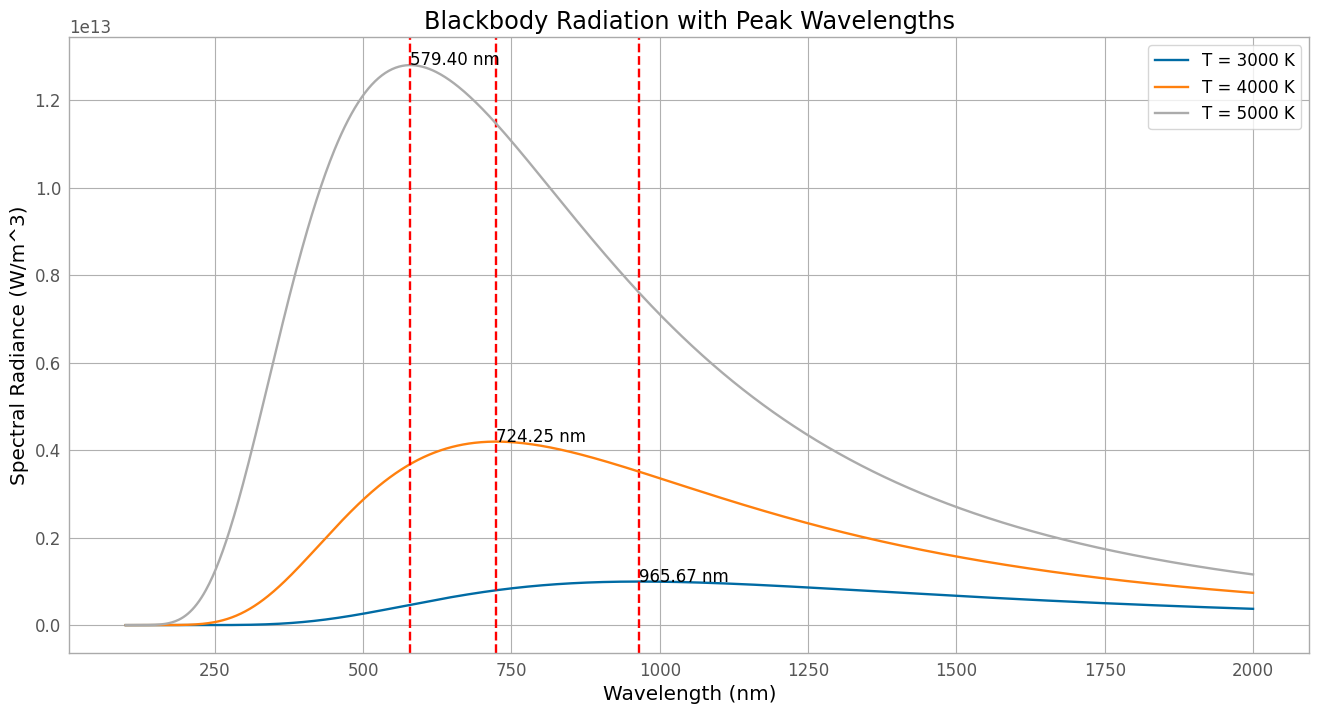

In [31]:
wavelengths = np.linspace(100, 2000, 1000) * 1e-9
temperatures = [3000, 4000, 5000]

for temp in temperatures:
    radiance = blackbody_radiation(wavelengths, temp)
    lambda_max = peak_wavelength(temp)
    lambda_max_nm = lambda_max * 1e9
    plt.plot(wavelengths * 1e9, radiance, label=f'T = {temp} K')
    plt.axvline(lambda_max_nm, color='r', linestyle='--')
    plt.text(lambda_max_nm, max(radiance), f'{lambda_max_nm:.2f} nm')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Radiance (W/m^3)')
plt.title('Blackbody Radiation with Peak Wavelengths')
plt.legend()
plt.show()

#### The Visible Light Spectrum

The visible light spectrum is the range of electromagnetic waves that can be detected by the human eye. It includes all the colours we see in a rainbow, from violet to red. Each colour corresponds to a specific range of wavelengths.

Let's zoom in on the blackbody radiation spectrum to see how the different colours fit within the electromagnetic spectrum. This will help us understand the relationship between temperature and the colour of light emitted by objects.

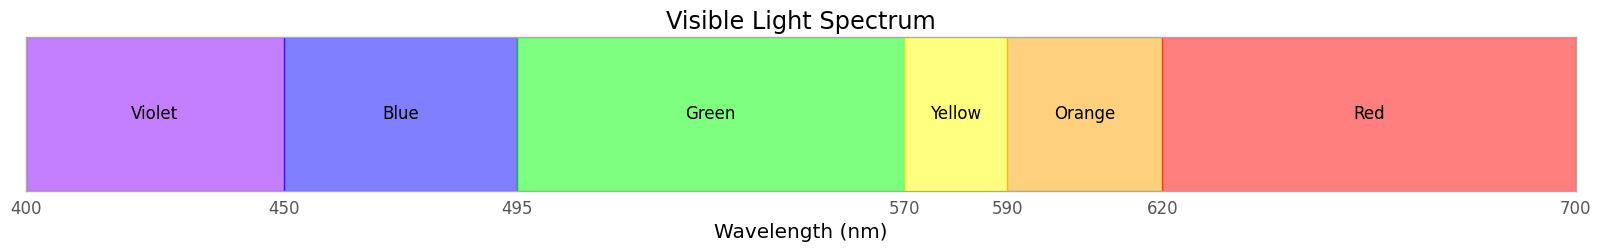

##### Think and Reflect:
1. What happens to the peak wavelength when the temperature is decreased? How might this affect the appearance of a star as it cools down?
2. Can you think of everyday examples where changes in temperature lead to changes in colour similar to those described by Wien's Law?

In [32]:
i18n.display_markdown('visible_spectrum')
plot.visibile_wavelengths()
i18n.display_markdown('visible_spectrum_reflection')

In [33]:
i18n.display_markdown('universe_expansion')
widgets.redshift()
i18n.display_markdown('universe_expansion_reflection')

## Expansion of the Universe

### The Doppler Effect

The Doppler effect is a phenomenon that occurs when there is relative motion between a source of waves and an observer. You may have noticed it with sound: for example, the siren of an ambulance sounds higher-pitched as it approaches you and lower-pitched as it moves away. This change in pitch happens because the sound waves are compressed as the ambulance approaches and stretched as it moves away.

<figure>
<img src="media/doppler_effect.png" />
<figcaption>The figure shows a moving ambulence, its moving to the right. The sound waves from the siren are compressed in the direction of travel, and streched in the direction the ambulence is leaving. <a href="https://online-learning-college.com/knowledge-hub/gcses/gcse-physics-help/doppler-effect/">Source.</a></figcaption>
</figure>

### Redshift and the Expanding Universe

The Doppler effect also applies to light waves. When a light source moves away from us, its light waves are stretched, making the light appear redder. This is called redshift. Conversely, if a light source moves toward us, its light waves are compressed, making the light appear bluer, which is called blueshift.

Redshift is a key piece of evidence for the expanding universe. By observing the redshift of light from distant galaxies, scientists have concluded that the universe is expanding. The further away a galaxy is, the faster it appears to be moving away from us, indicating that space itself is stretching.

<figure>
<img src="media/receding.gif" />
<figcaption>The above figure shows how the light from two galaxys moving away from eachother appears redshifted. This is the radio telescope that first measured the CMB. This photo is from April 2007. <a href="https://www.astro.ucla.edu/~wright/cosmo_01.htm">Source.</a></figcaption>
</figure>


##### Visualizing Redshift

Let's look at how redshift works with an interactive plot.


#### Think and Reflect

1. How does the redshift of light help us understand the movement of galaxies?
2. Why is redshift important evidence for the expanding universe?

In [34]:
i18n.display_markdown('cobe_data')
widgets.cobe_fit(blackbody_radiation, reference='Superconductor', temperature=2.75)
i18n.display_markdown('cobe_reflection')

## Analyzing COBE Data Spectrum

The Cosmic Background Explorer (COBE) was a satellite launched by NASA in 1989 to measure the diffuse infrared and microwave radiation from the early universe. One of its key discoveries was the detailed measurement of the Cosmic Microwave Background (CMB) radiation, which closely matches the spectrum of a perfect blackbody.

In this activity, you'll use real data from the COBE mission. By adjusting the temperature of a blackbody radiation curve, you can see how well it fits the actual measurements. The goal is to find the temperature that best matches the COBE data points.

### Interactive Analysis with COBE Data

Let's visualize the COBE data points and fit a blackbody radiation curve to them by adjusting the temperature.

TypeError: cobe_fit() got an unexpected keyword argument 'reference'

In [ ]:
i18n.display_markdown('cmb_maps')
widgets.cmb_planck_map()
i18n.display_markdown('cmb_maps_analysis')

In [ ]:
i18n.display_markdown('std_dev')
widgets.cmb_std_dev()
i18n.display_markdown('std_dev_coding')

In [ ]:
%%skip_on_error

# Variable containing the CMB temperature fluctuation data in micro Kelvin.
cmb_map = cmb_data.map * 1e6

mean_temperature = np.mean(cmb_map)

std_deviation = np.std(cmb_map)

one_sigma = mean_temperature + std_deviation
two_sigma = mean_temperature + 2 * std_deviation
three_sigma = mean_temperature + 3 * std_deviation

print(f"Mean temperature fluctuation: {mean_temperature:.2f} μK")
print(f"Standard deviation: {std_deviation:.2f} μK")
print(f"1 sigma: {one_sigma:.2f} μK")
print(f"2 sigma: {two_sigma:.2f} μK")
print(f"3 sigma: {three_sigma:.2f} μK")

In [ ]:
i18n.display_markdown('std_dev_reflection')

In [ ]:
i18n.display_markdown('cmb_map')
widgets.cmb_map_iframe()

In [ ]:
i18n.display_markdown('cmb_map_features')
widgets.cmb_map_objects(answers=True)

In [ ]:
i18n.display_markdown('moon_distance')

In [ ]:
# Calculate the the distance to the moon in km and the light travel time in seconds:
moon_distance = 3_474 / np.deg2rad(0.52)
light_travel_time = moon_distance / 300_000

In [ ]:
widgets.calculate_moon_distance(moon_distance, light_travel_time)

In [ ]:
i18n.display_markdown('age_scale')

In [ ]:
i18n.display_markdown('hotspots')
widgets.cmb_map_iframe()

In [ ]:
widgets.coordinate_inputs(initial_coords=const.cmb_thumbnails_coords_extra)
i18n.display_markdown('hotspots_reflection')

In [ ]:
i18n.display_markdown('hotspot_average')
widgets.cmb_thumbnails_averaging(all=True)

In [ ]:
i18n.display_markdown('hotspot_horizontal')
widgets.averaged_hotspot_horizontal_profile(value=30)

In [ ]:
i18n.display_markdown('hotspot_radial')
widgets.averaged_hotspot_radial_profile(value=30)

In [ ]:
i18n.display_markdown('cmb_light')

In [ ]:
%%skip_on_error

# Measured angular size in degrees (from the radial profile analysis)
angular_size_degrees = 0.6053

# Convert angular size to radians
angular_size_radians = np.deg2rad(angular_size_degrees)

# Physical size of the sound horizon
physical_size = 150 # Mpc

# Calculate the distance
distance = physical_size / angular_size_radians
print(f"Distance that CMB light has traveled: {distance:.2f} Mpc")

# Speed of light in Mpc/year
speed_of_light_mpc_per_year = 3.06e-7

# Calculate the travel time in years
time_traveled_years = distance / speed_of_light_mpc_per_year 

# Convert the travel time to billion years (1e9 years)
time_traveled_gyr = time_traveled_years / 1e9
print(f"Time traveled by CMB light: {time_traveled_gyr:.2f} Gyr")

In [ ]:
i18n.display_markdown('hubble_parameter')

In [ ]:
cmb_utils.measure_distance(h_0=68)

In [ ]:
i18n.display_markdown('workshop_reflection')